In [1]:
import numpy as np
import matplotlib.pyplot as plt

E = 210E9 
A = 10 # cm^2
L = 150
T = -20 # N/cm^2
Particion = 10

# E = 30E6 
# A = 2 # cm^2
# L = 60
# T = -10 # N/cm^2
# Particion = 4



In [2]:
Matriz_global = np.zeros([Particion+1,Particion+1])
F = np.zeros (Particion+1)

matriz = np.array([[1,-1],[-1,1]])
K = (E*A*Particion)/L

Ft = (1/2)*T*(L/Particion)**2   
f1 =  Ft/3  
f2 = (2*Ft)/3      


empotramiento = np.array([[0]])

In [3]:
# Matriz de rigidez
for i in range(Particion):

    #matriz global
    
     Matriz_local = K*matriz         
     A_G = np.array([i,i+1],dtype = int)
     Matriz_global[np.ix_(A_G,A_G)] +=  Matriz_local
     
     #Fuerzas    
     Fu = Ft * i   
     F[i] += (Fu + f1)
     F[i+1] += (Fu + f2)


F = np.array(F).reshape(-1,1)
Desplazamientos = np.linalg.solve (Matriz_global[0:Particion,0:Particion],F[0:Particion])
Desplazamientos = np.concatenate((Desplazamientos,empotramiento))
Fuerzas = np.dot(Matriz_global,Desplazamientos)
Reaccion = Fuerzas[Particion] - F[Particion]

In [4]:
print(Matriz_global)
print()
print(F)
print()
print(Reaccion)

[[ 1.4e+11 -1.4e+11  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00]
 [-1.4e+11  2.8e+11 -1.4e+11  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00 -1.4e+11  2.8e+11 -1.4e+11  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00 -1.4e+11  2.8e+11 -1.4e+11  0.0e+00  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00 -1.4e+11  2.8e+11 -1.4e+11  0.0e+00  0.0e+00
   0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00 -1.4e+11  2.8e+11 -1.4e+11  0.0e+00
   0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00 -1.4e+11  2.8e+11 -1.4e+11
   0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00 -1.4e+11  2.8e+11
  -1.4e+11  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00 -1.4e+11
   2.8e+11 -1.4e+11  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00

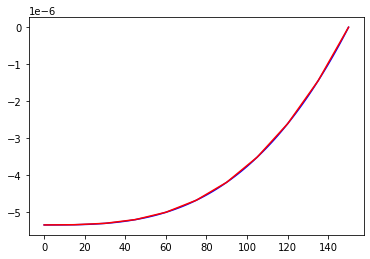

In [5]:
espacio = np.linspace(0,150,Particion+1)

espacio2 = np.linspace(0,150,100)
exacta = lambda x: (-T*(x**3-L**3))/(6*A*E)

plt.plot(espacio2,exacta(espacio2),'b')
plt.plot(espacio,Desplazamientos,'r')
plt.show()

In [10]:
auxiliar = np.array([-Particion/L,Particion/L])
Tension = np.zeros(Particion)
espacio = np.linspace(0,L - (L/(Particion)),Particion) + (L/(Particion*2))

for i in range(Particion):
    Tension [i] = E * np.dot(auxiliar,Desplazamientos[i:i+2])


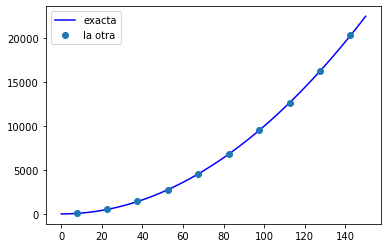

In [13]:
espacio2 = np.linspace(0,L,100) 
exacta = lambda x: (-T*(x**2))/(2*A) #tomar valores medios

plt.plot(espacio2,exacta(espacio2),'b', label = 'exacta') 
plt.plot(espacio,Tension,'o', label = 'la otra') #un elemento menos
plt.legend()
plt.show()

In [8]:
print(Tension)

[   75.   525.  1425.  2775.  4575.  6825.  9525. 12675. 16275. 20325.]


In [14]:
Tension = np.array(Tension)

TENY = np.hstack( ([0.0], Tension) )
# plt.step(self.MN[:, 0], TENY, 'r',
#     where='pre', label='Solución Numérica')

In [15]:
TENY

array([    0.,    75.,   525.,  1425.,  2775.,  4575.,  6825.,  9525.,
       12675., 16275., 20325.])

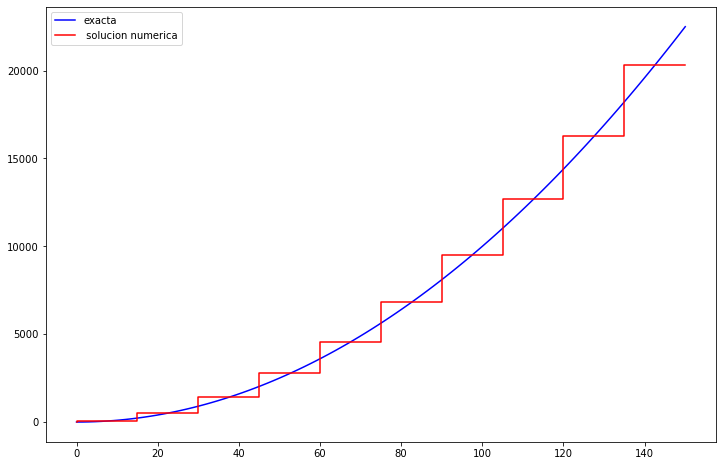

In [21]:
plt.figure(figsize = (12,8))
plt.plot(espacio2,exacta(espacio2),'b', label = 'exacta') 
plt.step(np.linspace(0,L,Particion+1),TENY,'r',where = 'pre', label = ' solucion numerica')
plt.legend()
plt.show()